-------------------------------------------
Affichage données standardisées            


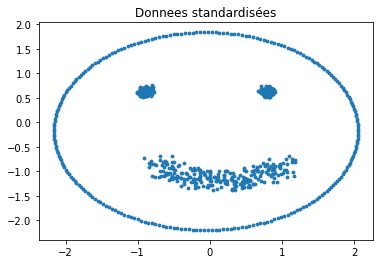

-----------------------------------------
Dendrogramme 'complete' données standardisées


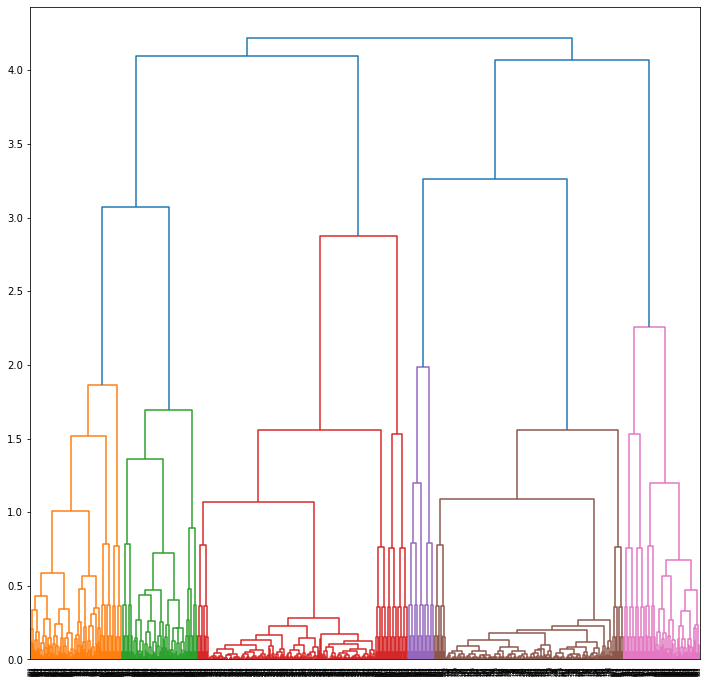

-----------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de k fixée


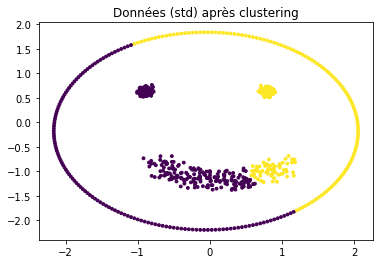

nb clusters = 2 , runtime =  12.0 ms
Coefficient de silhouette :  0.41915279621040435


In [44]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 20 21:28:40 2021

@author: huguet
"""
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics


##################################################################
# READ a data set (arff format)

# Parser un fichier de données au format arff
# datanp est un tableau (numpy) d'exemples avec pour chacun la liste 
# des valeurs des features

# Note 1 : 
# dans les jeux de données considérés : 2 features (dimension 2 seulement)
# t =np.array([[1,2], [3,4], [5,6], [7,8]]) 
#
# Note 2 : 
# le jeu de données contient aussi un numéro de cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
#    2d-4c-no9.arff   xclara.arff

path = './artificial/'
databrut = arff.loadarff(open(path+"smile1.arff", 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])


########################################################################
# Preprocessing: standardization of data
########################################################################

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(datanp)

data_scaled = scaler.transform(datanp)

import scipy.cluster.hierarchy as shc

print("-------------------------------------------")
print("Affichage données standardisées            ")
f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne
#print(f0)
#print(f1)

plt.scatter(f0_scaled, f1_scaled, s=8)
plt.title("Donnees standardisées")
plt.show()

print("-----------------------------------------")
print("Dendrogramme 'complete' données standardisées")

distance = shc.linkage(data_scaled, 'complete')


plt.figure(figsize=(12, 12))
shc.dendrogram(distance,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=False)
plt.show()

# Run clustering method for a given number of clusters
print("-----------------------------------------------------------")
print("Appel Aglo Clustering 'complete' pour une valeur de k fixée")
tps3 = time.time()
k=2
model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
model_scaled.fit(data_scaled)
#cluster.fit_predict(X)

tps4 = time.time()
labels_scaled = model_scaled.labels_

plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
plt.title("Données (std) après clustering")
plt.show()
print("nb clusters =",k,", runtime = ", round((tps4 - tps3)*1000,2),"ms")
#print("labels", labels)

# Some evaluation metrics
silh = metrics.silhouette_score(data_scaled, labels_scaled, metric='euclidean')
print("Coefficient de silhouette : ", silh)

########################################################################
# TRY : parameters for dendrogram and hierarchical clustering
# EVALUATION : with several metrics (for several number of clusters)
########################################################################

-------------------------------------------
Affichage données standardisées            


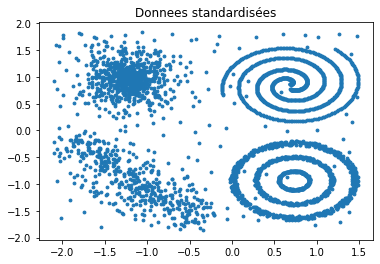

-----------------------------------------


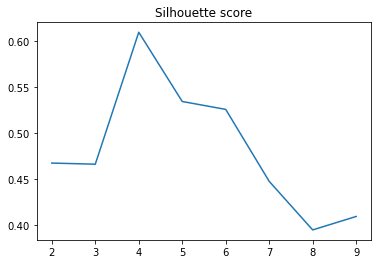

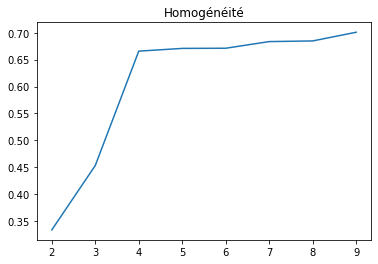

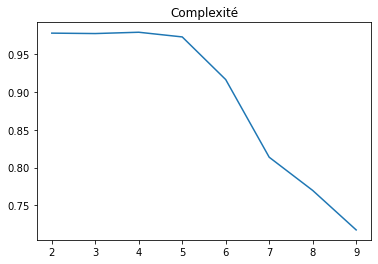

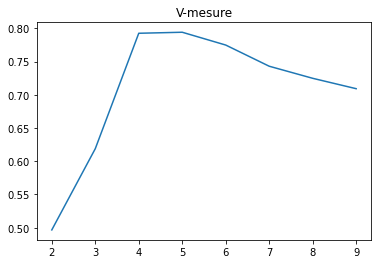

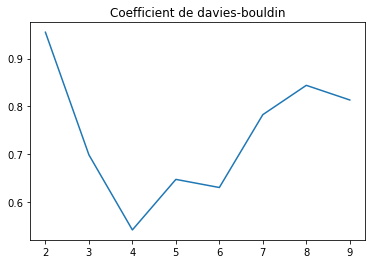

Best complexity :  3
Best homogeneity :  2
Best silhouette :  4
Best v-measure :  5
Best Davies-Bouldin :  4

best k is =  4
------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de 4 determinée automatiquement


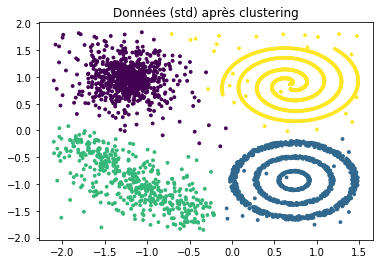

nb clusters = 4 , runtime =  3090.26 ms


In [43]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 20 21:28:40 2021

@author: huguet
"""
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.core.fromnumeric import compress

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics


##################################################################
# READ a data set (arff format)

# Parser un fichier de données au format arff
# datanp est un tableau (numpy) d'exemples avec pour chacun la liste 
# des valeurs des features

# Note 1 : 
# dans les jeux de données considérés : 2 features (dimension 2 seulement)
# t =np.array([[1,2], [3,4], [5,6], [7,8]]) 
#
# Note 2 : 
# le jeu de données contient aussi un numéro de cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
#    2d-4c-no9.arff   xclara.arff

path = './artificial/'
databrut = arff.loadarff(open(path+"impossible.arff", 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])


########################################################################
# Preprocessing: standardization of data
########################################################################

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(datanp)

data_scaled = scaler.transform(datanp)

import scipy.cluster.hierarchy as shc

print("-------------------------------------------")
print("Affichage données standardisées            ")
f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne
ground_truth = np.array([[x[0],x[1],x[2]] for x in databrut[0]])[:,2]
#print(f0)
#print(f1)

plt.scatter(f0_scaled, f1_scaled, s=8)
plt.title("Donnees standardisées")
plt.show()

print("-----------------------------------------")


def plot_metrics(Y, title):
    plt.plot(range(2,10), Y)
    plt.title(title)
    plt.show()

def find_max(liste):
    max_index, max_value = max(enumerate(liste), key=lambda x: x[1])
    return max_index

def find_min(liste):
    min_index, min_value = min(enumerate(liste), key=lambda x: x[1])
    return min_index

def compute_distance(X, Y):
    return np.sqrt(np.sum(np.square(X[0]-X[1]) + np.square(Y[0]-Y[1])))

def find_best_index(liste, cmp):
    distances = []
    best_index = 0
    for i in range(len(liste)):
        distance = compute_distance(cmp, [i, liste[i]])
        distances.append(distance)

    best_index = find_min(distances)
    return best_index

def get_best_k():
    silhs = []
    homs = []
    v_meas = []
    dbss = []
    comps = []
    models = []
    
    for k in range(2,10):
        model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
        model_scaled.fit(data_scaled)     
        labels_scaled = model_scaled.labels_
        silhs.append(metrics.silhouette_score(data_scaled, labels_scaled, metric='euclidean'))  
        hom, comp, v_mea = metrics.homogeneity_completeness_v_measure(ground_truth, labels_scaled)
        homs.append(hom)
        comps.append(comp)
        v_meas.append(v_mea)
        dbss.append(metrics.davies_bouldin_score(data_scaled, labels_scaled))
        models.append(model_scaled)
    
    plot_metrics(silhs, "Silhouette score")
    plot_metrics(homs, "Homogénéité")
    plot_metrics(comps, "Complexité")
    plot_metrics(v_meas, "V-mesure")
    plot_metrics(dbss, "Coefficient de davies-bouldin")
    
    best_silh = find_max(silhs)
    best_v_meas = find_max(v_meas)
    best_homs = find_best_index(homs, [0.0, 1.0])
    best_comps = find_best_index(comps, [1.0, 9.0])
    best_dbss = find_min(dbss)

    mean_k = (best_silh + best_v_meas + best_homs + best_comps + best_dbss)/5
    best_k = round(mean_k) + 2
    
    print("Best complexity : ", best_comps + 2)
    print("Best homogeneity : ", best_homs + 2)
    print("Best silhouette : ", best_silh + 2)
    print("Best v-measure : ", best_v_meas + 2)
    print("Best Davies-Bouldin : ", best_dbss + 2)
    print("\nbest k is = ", best_k)
    
    print("------------------------------------------------------")

    return best_k, models[best_k-2]

def run_with_best_k():
    tps3 = time.time()
    k, model_scaled = get_best_k()
    print(f"Appel Aglo Clustering 'complete' pour une valeur de {k} determinée automatiquement")
    tps4 = time.time()
    labels_scaled = model_scaled.labels_

    plt.scatter(f0_scaled, f1_scaled, c=labels_scaled, s=8)
    plt.title("Données (std) après clustering")
    plt.show()
    print("nb clusters =",k,", runtime = ", round((tps4 - tps3)*1000,2),"ms")

run_with_best_k()